<a href="https://colab.research.google.com/github/SGP23/MACHINE_LEARNING_PROJECTS/blob/main/Airline_Customer_Satisfaction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📥 Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

#📂Load and Explore Dataset

In [ ]:
data=pd.read_csv(r"/content/ML Project - Decision Tree Airline Customer Satisfaction U16955468980.txt")

In [ ]:
data

,Unnamed: 0.1,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,124365,Male,Loyal Customer,50,Business travel,Business,3599,3,...,5,5,5,5,5,5,4,12,24.0,satisfied
9996,9996,9996,22044,Male,Loyal Customer,38,Business travel,Business,3873,5,...,4,4,4,4,3,4,5,0,0.0,satisfied
9997,9997,9997,14057,Female,Loyal Customer,39,Business travel,Business,319,4,...,4,4,4,4,3,4,2,0,0.0,satisfied
9998,9998,9998,113848,Male,Loyal Customer,52,Business travel,Business,1363,5,...,4,4,3,4,5,4,5,1,11.0,satisfied


In [ ]:
data.head()

,Unnamed: 0.1,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
data.tail()

,Unnamed: 0.1,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
9995,9995,9995,124365,Male,Loyal Customer,50,Business travel,Business,3599,3,...,5,5,5,5,5,5,4,12,24.0,satisfied
9996,9996,9996,22044,Male,Loyal Customer,38,Business travel,Business,3873,5,...,4,4,4,4,3,4,5,0,0.0,satisfied
9997,9997,9997,14057,Female,Loyal Customer,39,Business travel,Business,319,4,...,4,4,4,4,3,4,2,0,0.0,satisfied
9998,9998,9998,113848,Male,Loyal Customer,52,Business travel,Business,1363,5,...,4,4,3,4,5,4,5,1,11.0,satisfied
9999,9999,9999,1865,Female,Loyal Customer,41,Business travel,Business,3938,4,...,5,5,4,5,5,5,4,0,0.0,satisfied


In [ ]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9974.000000
mean,4999.50000,4999.50000,64950.978500,39.303700,1198.823800,2.731500,3.038900,2.753600,2.96890,3.208800,...,3.411300,3.335500,3.366000,3.346500,3.619900,3.285600,3.627400,3.268200,14.785400,15.242130
std,2886.89568,2886.89568,37420.905082,15.116478,1001.774138,1.328226,1.528077,1.403241,1.28425,1.339769,...,1.326012,1.340567,1.288336,1.311415,1.190028,1.269013,1.181401,1.321077,38.217509,38.810195
min,0.00000,0.00000,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2499.75000,2499.75000,32330.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.00000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,4999.50000,4999.50000,64941.000000,40.000000,852.500000,3.000000,3.000000,3.000000,3.00000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,7499.25000,7499.25000,97579.750000,51.000000,1747.000000,4.000000,4.000000,4.000000,4.00000,4.000000,...,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,9999.00000,9999.00000,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.00000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0.1                       10000 non-null  int64  
 1   Unnamed: 0                         10000 non-null  int64  
 2   id                                 10000 non-null  int64  
 3   Gender                             10000 non-null  object 
 4   Customer Type                      10000 non-null  object 
 5   Age                                10000 non-null  int64  
 6   Type of Travel                     10000 non-null  object 
 7   Class                              10000 non-null  object 
 8   Flight Distance                    10000 non-null  int64  
 9   Inflight wifi service              10000 non-null  int64  
 10  Departure/Arrival time convenient  10000 non-null  int64  
 11  Ease of Online booking             10000 non-null  int6

In [ ]:
data.sample()

,Unnamed: 0.1,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
7092,7092,7092,56231,Male,Loyal Customer,34,Personal Travel,Eco,1608,3,...,1,3,3,3,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
data.isnull()

,Unnamed: 0.1,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0


#🧹 Data Cleaning and Transformation

In [ ]:
data=data.drop(["Unnamed: 0.1","Unnamed: 0"],axis=1)

In [ ]:
data

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,124365,Male,Loyal Customer,50,Business travel,Business,3599,3,3,3,...,5,5,5,5,5,5,4,12,24.0,satisfied
9996,22044,Male,Loyal Customer,38,Business travel,Business,3873,5,5,5,...,4,4,4,4,3,4,5,0,0.0,satisfied
9997,14057,Female,Loyal Customer,39,Business travel,Business,319,4,4,4,...,4,4,4,4,3,4,2,0,0.0,satisfied
9998,113848,Male,Loyal Customer,52,Business travel,Business,1363,5,5,5,...,4,4,3,4,5,4,5,1,11.0,satisfied


In [ ]:
data.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
data.columns=[each.replace(" ","_") for each in data.columns]

In [ ]:
data.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
data["satisfaction"]=[1 if each == "satisfied" else 0 for each in data.satisfaction]

In [ ]:
data["satisfaction"].value_counts()

,count
satisfaction,
0,5689
1,4311


#📊 Exploratory Data Insights

<Axes: xlabel='satisfaction'>

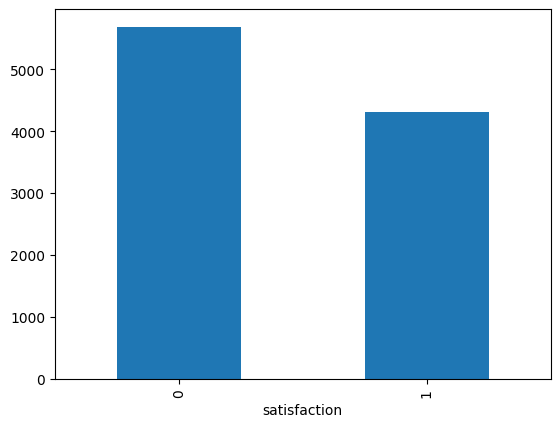

In [ ]:
data["satisfaction"].value_counts().plot(kind="bar")

In [ ]:
data["Gender"].value_counts()

,count
Gender,
Female,5108
Male,4892


<Axes: xlabel='Gender'>

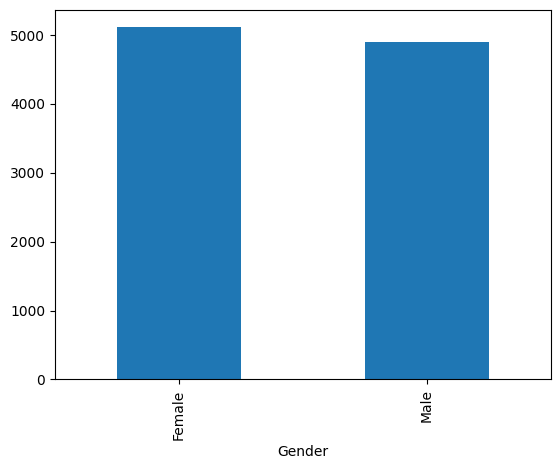

In [ ]:
data["Gender"].value_counts().plot(kind="bar")

In [ ]:
data[["Gender","satisfaction"]].groupby(["Gender"],as_index=False).mean()

,Gender,satisfaction
0,Female,0.424432
1,Male,0.438062


In [ ]:
data["Age"].value_counts()

,count
Age,
25,272
40,272
39,252
22,238
42,236
...,...
74,4
75,3
76,3


In [ ]:
data[["Age","satisfaction"]].groupby(["Age"],as_index=False).mean()

,Age,satisfaction
0,7,0.071429
1,8,0.081967
2,9,0.194030
3,10,0.137255
4,11,0.115942
...,...,...
69,76,0.000000
70,77,0.222222
71,79,0.666667
72,80,0.111111


<Axes: xlabel='Food_and_drink'>

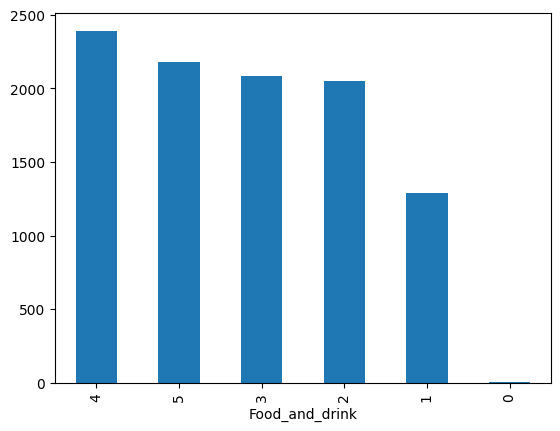

In [ ]:
data["Food_and_drink"].value_counts().plot(kind="bar")

In [ ]:
data[["Food_and_drink","satisfaction"]].groupby(["Food_and_drink"],as_index=False).mean()

,Food_and_drink,satisfaction
0,0,0.625000
1,1,0.198142
2,2,0.362305
3,3,0.404990
4,4,0.515050
5,5,0.566176


<Axes: >

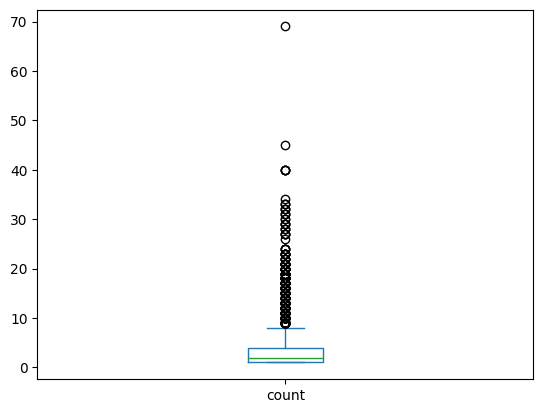

In [ ]:
data["Flight_Distance"].value_counts().plot(kind="box")

<Axes: >

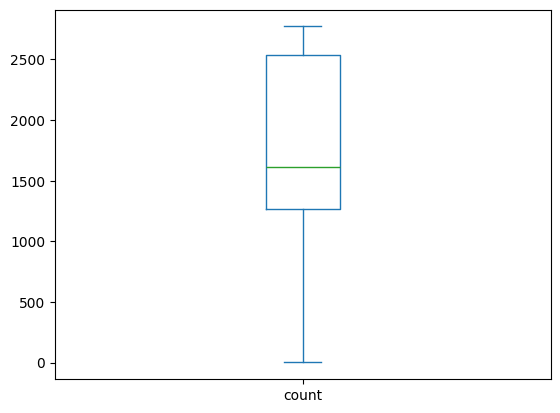

In [ ]:
data["Checkin_service"].value_counts().plot(kind="box")

#🧼 Handle Nulls and Encode Categoricals

In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

,0
id,0
Gender,0
Customer_Type,0
Age,0
Type_of_Travel,0
Class,0
Flight_Distance,0
Inflight_wifi_service,0
Departure/Arrival_time_convenient,0
Ease_of_Online_booking,0


In [ ]:
data["Flight_Distance"].unique()

array([ 460,  235, 1142, ..., 3033, 1319, 1443])

In [ ]:
data.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
data

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,124365,Male,Loyal Customer,50,Business travel,Business,3599,3,3,3,...,5,5,5,5,5,5,4,12,24.0,1
9996,22044,Male,Loyal Customer,38,Business travel,Business,3873,5,5,5,...,4,4,4,4,3,4,5,0,0.0,1
9997,14057,Female,Loyal Customer,39,Business travel,Business,319,4,4,4,...,4,4,4,4,3,4,2,0,0.0,1
9998,113848,Male,Loyal Customer,52,Business travel,Business,1363,5,5,5,...,4,4,3,4,5,4,5,1,11.0,1


In [ ]:
enc=LabelEncoder()

In [ ]:
data=data.drop("id",axis=1)

In [ ]:
data["Gender"]=enc.fit_transform(data["Gender"])

In [ ]:
data["Customer_Type"]=enc.fit_transform(data["Customer_Type"])
data["Type_of_Travel"]=enc.fit_transform(data["Type_of_Travel"])
data["Class"]=enc.fit_transform(data["Class"])

#⚙️ Feature Scaling


In [ ]:
x=data.drop("satisfaction",axis=1)

In [ ]:
y=data["satisfaction"]

In [ ]:
cols=x.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
x=sc.fit_transform(x)

In [ ]:
x

array([[ 1.022101  , -0.46815207, -1.7390128 , ...,  1.31151575,
         0.2672691 ,  0.07106403],
       [ 1.022101  ,  2.13605805, -0.9454767 , ..., -1.71598135,
        -0.3602227 , -0.23814858],
       [-0.9783769 , -0.46815207, -0.87934869, ...,  1.31151575,
        -0.38636819, -0.39275488],
       ...,
       [-0.9783769 , -0.46815207, -0.01968459, ..., -0.95910708,
        -0.38636819, -0.39275488],
       [ 1.022101  , -0.46815207,  0.83997952, ...,  1.31151575,
        -0.3602227 , -0.10930999],
       [-0.9783769 , -0.46815207,  0.11257143, ...,  0.55464148,
        -0.38636819, -0.39275488]])

In [ ]:
x=pd.DataFrame(x,columns=cols)

In [ ]:
x

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1.022101,-0.468152,-1.739013,1.507418,2.269235,-0.737519,0.201740,0.629103,0.175328,-1.534155,...,1.197922,1.241813,0.492014,-0.264779,0.319439,0.562836,1.161719,1.311516,0.267269,0.071064
1,1.022101,2.136058,-0.945477,-0.663386,-0.947100,-0.962124,0.201740,-0.680029,0.175328,0.023662,...,-1.818316,-1.741829,-1.836318,1.260872,-0.520774,-1.801501,0.315212,-1.715981,-0.360223,-0.238149
2,-0.978377,-0.468152,-0.879349,-0.663386,-0.947100,-0.056715,-0.551311,-0.680029,-0.537562,-0.755246,...,1.197922,1.241813,0.492014,-0.264779,0.319439,0.562836,0.315212,1.311516,-0.386368,-0.392755
3,-0.978377,-0.468152,-0.945477,-0.663386,-0.947100,-0.635698,-0.551311,1.283668,1.601106,1.581480,...,-1.064257,-0.995918,-1.060207,1.260872,-0.520774,-1.801501,0.315212,-0.959107,-0.098768,-0.160845
4,1.022101,-0.468152,1.435132,-0.663386,-0.947100,-0.983087,0.201740,-0.025463,0.175328,0.023662,...,1.197922,-0.250008,-0.284097,0.498047,0.319439,-0.225277,-0.531294,-0.202233,-0.386368,-0.392755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9969,1.022101,-0.468152,0.707724,-0.663386,-0.947100,2.395974,0.201740,-0.025463,0.175328,0.023662,...,0.443862,1.241813,1.268125,1.260872,1.159652,1.350948,1.161719,0.554641,-0.072622,0.225670
9970,1.022101,-0.468152,-0.085813,-0.663386,-0.947100,2.669493,1.707841,1.283668,1.601106,1.581480,...,1.197922,0.495903,0.492014,0.498047,0.319439,-0.225277,0.315212,1.311516,-0.386368,-0.392755
9971,-0.978377,-0.468152,-0.019685,-0.663386,-0.947100,-0.878271,0.954790,0.629103,0.888217,0.802571,...,0.443862,0.495903,0.492014,0.498047,0.319439,-0.225277,0.315212,-0.959107,-0.386368,-0.392755
9972,1.022101,-0.468152,0.839980,-0.663386,-0.947100,0.163897,1.707841,1.283668,1.601106,1.581480,...,1.197922,0.495903,0.492014,-0.264779,0.319439,1.350948,0.315212,1.311516,-0.360223,-0.109310


#🧪 Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(7979, 22)

In [ ]:
x_test.shape

(1995, 22)

In [ ]:
y_train.shape

(7979,)

In [ ]:
y_test.shape

(1995,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 12,
             'max_features': "sqrt",
            'min_samples_leaf':1,
             'min_samples_split':2,
            'criterion':'gini'}

model_dt = DecisionTreeClassifier(**params_dt)

#📊 Model Evaluation Function


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

In [ ]:
def run_model(model_dt, x_train, y_train, x_test, y_test):
    model_dt.fit(x_train,y_train.ravel())
    y_pred = model_dt.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("pricison_score: ",precision_score(y_test, y_pred))
    print("recall_score: ",recall_score(y_test, y_pred))
    print("Accuracy = {}".format(accuracy))
    print(classification_report(y_test,y_pred,digits=5))
    print(confusion_matrix(y_test,y_pred))

In [ ]:
run_model(model_dt,x_train, y_train, x_test, y_test)

pricison_score:  0.8905704307334109
recall_score:  0.8864426419466975
Accuracy = 0.9037593984962407
              precision    recall  f1-score   support

           0    0.91373   0.91696   0.91534      1132
           1    0.89057   0.88644   0.88850       863

    accuracy                        0.90376      1995
   macro avg    0.90215   0.90170   0.90192      1995
weighted avg    0.90371   0.90376   0.90373      1995

[[1038   94]
 [  98  765]]


<ipython-input-102-b6e1516f5a47>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model_dt.fit(x_train,y_train.ravel())
